In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# EDA

In [2]:
#load the dataset

df = pd.read_csv('Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   Class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.flight.value_counts()

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [6]:
#drop the unnamed column
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.drop('flight', axis = 1, inplace = True)

In [7]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'Class', 'duration', 'days_left', 'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   Class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [9]:
#check the total number of unique values
df.nunique()

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
Class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [10]:
#statistical description of numeric column
df.describe()[['duration', 'days_left','price']].T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [11]:
df.describe(include='object').T

,count,unique,top,freq
airline,300153,6,Vistara,127859
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
Class,300153,2,Economy,206666


# Data Visualization

# Price vs. Airlines:

## Varierar priserna med flygbolagen?

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


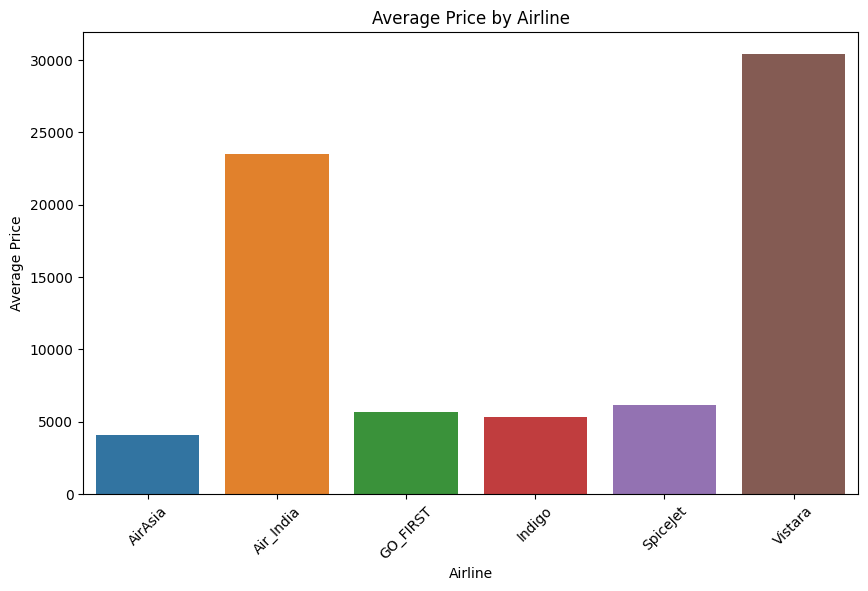

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grupperar datan på airline och kalkulerar average price.
avg_price_by_airline = df.groupby('airline')['price'].mean().reset_index()

# Skapar en bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='price', data=avg_price_by_airline)
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Price by Airline')
plt.show()

# b) Price vs. Days Left:

## Hur påverkas priset beroende på när man bokar biljetten?

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

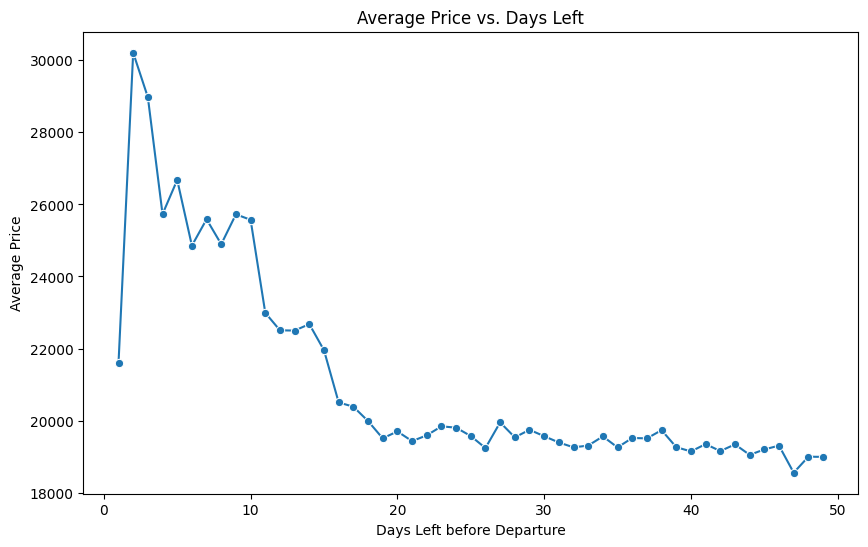

In [13]:
# Group data by days_left and calculate average price
avg_price_by_days_left = df.groupby('days_left')['price'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=avg_price_by_days_left, marker='o')
plt.xlabel('Days Left before Departure')
plt.ylabel('Average Price')
plt.title('Average Price vs. Days Left')
plt.show()

# c) Price vs. Departure Time and Arrival Time:

## Ändras biljettpriset baserat på avresetid och ankomsttid?

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

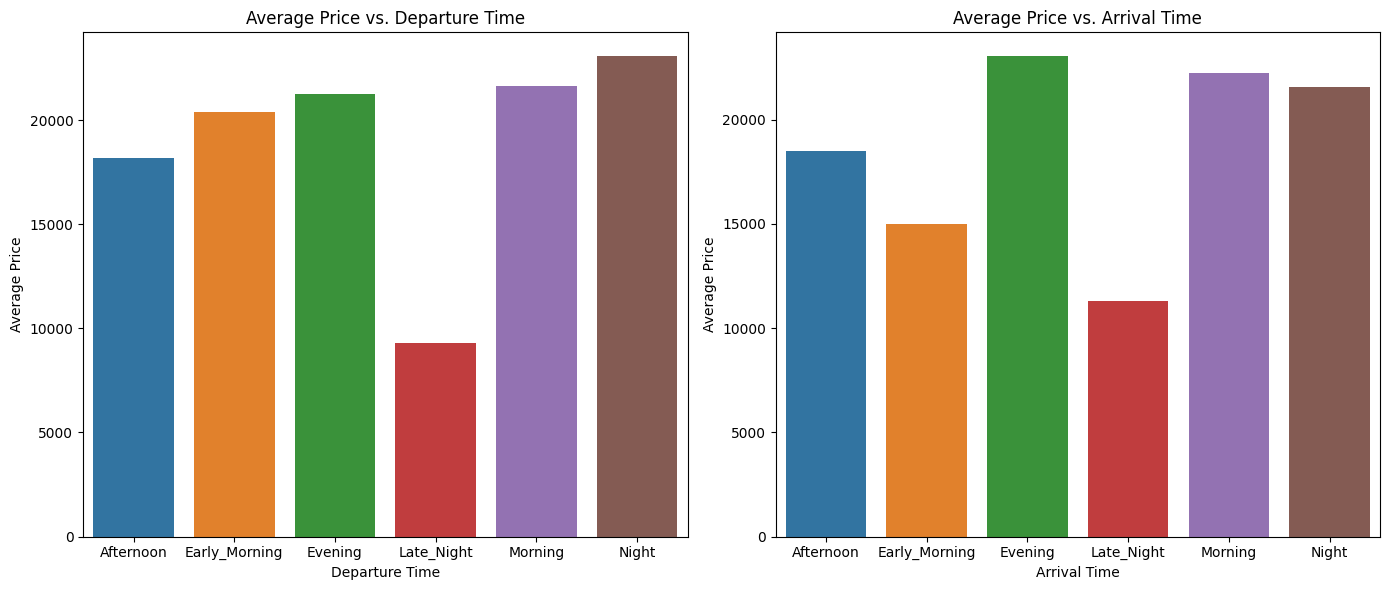

In [14]:
# Group data by departure_time and arrival_time and calculate average price
avg_price_by_departure_time = df.groupby('departure_time')['price'].mean().reset_index()
avg_price_by_arrival_time = df.groupby('arrival_time')['price'].mean().reset_index()

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Departure Time vs. Price
sns.barplot(x='departure_time', y='price', data=avg_price_by_departure_time, ax=ax1)
ax1.set_xlabel('Departure Time')
ax1.set_ylabel('Average Price')
ax1.set_title('Average Price vs. Departure Time')

# Arrival Time vs. Price
sns.barplot(x='arrival_time', y='price', data=avg_price_by_arrival_time, ax=ax2)
ax2.set_xlabel('Arrival Time')
ax2.set_ylabel('Average Price')
ax2.set_title('Average Price vs. Arrival Time')

plt.tight_layout()
plt.show()

# d) Price vs. Source and Destination:

## Hur påverkas priset av en förändring av avreseort och destination?

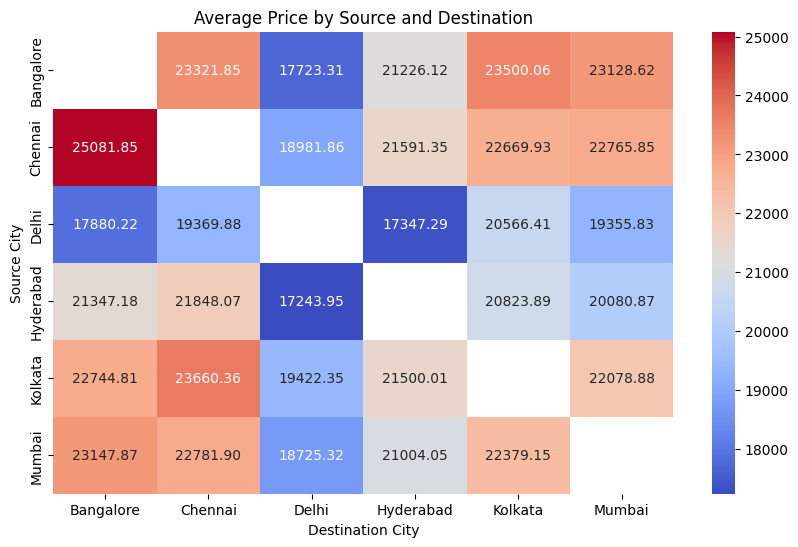

In [15]:
# Group data by source_city and destination_city and calculate average price
avg_price_by_route = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Create a pivot table
pivot_table = avg_price_by_route.pivot(index='source_city', columns='destination_city', values='price')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Average Price by Source and Destination')
plt.show()

## e) Price vs. Class:

Hur varierar biljettpriset mellan economy och business-class?

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


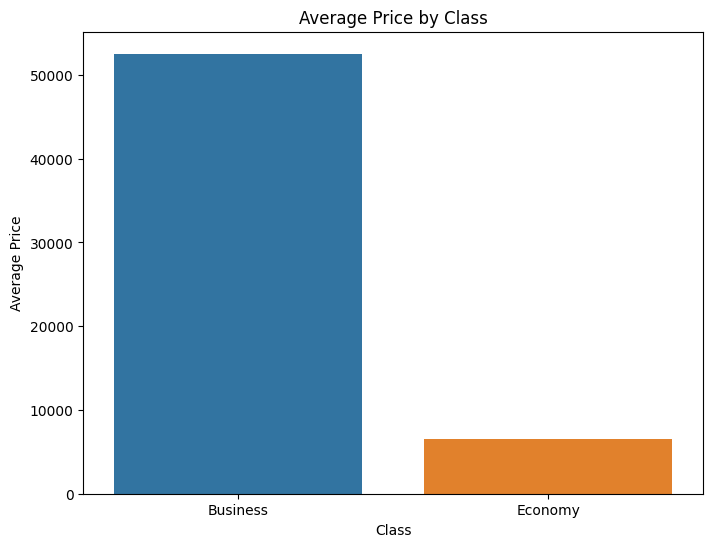

In [16]:
# Group data by class and calculate average price
avg_price_by_class = df.groupby('Class')['price'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='price', data=avg_price_by_class)
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.title('Average Price by Class')
plt.show()

# Modelling

In [17]:
from sklearn.preprocessing import LabelEncoder

le_airline = LabelEncoder()
df ['airline'] = le_airline.fit_transform(df['airline'])
df['airline'].unique()

le_source_city = LabelEncoder()
df ['source_city'] = le_source_city.fit_transform(df['source_city'])
df['source_city'].unique()

le_departure_time = LabelEncoder()
df ['departure_time'] = le_departure_time.fit_transform(df['departure_time'])
df['departure_time'].unique()

le_stops = LabelEncoder()
df ['stops'] = le_stops.fit_transform(df['stops'])
df['stops'].unique()

le_arrival_time = LabelEncoder()
df ['arrival_time'] = le_arrival_time.fit_transform(df['arrival_time'])
df['arrival_time'].unique()

le_destination_city = LabelEncoder()
df ['destination_city'] = le_destination_city.fit_transform(df['destination_city'])
df['destination_city'].unique()

le_class = LabelEncoder()
df ['Class'] = le_class.fit_transform(df['Class'])
df['Class'].unique()



array([1, 0])

In [18]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,Class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [19]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [20]:
X_train.shape, X_val.shape, X_train_val.shape, X_test.shape

((192097, 9), (48025, 9), (240122, 9), (60031, 9))

## Random Forest Regressor

In [21]:
from sklearn.model_selection import GridSearchCV

#create a random forest regressor med hjälp av Grid Search Cross Validation

max_depth = [None,10]
parameters = {'max_depth': max_depth, 'n_estimators': [10 , 20],
              'min_samples_split': [2, 5],'min_samples_leaf': [1, 2] }
   
regressor = RandomForestRegressor(random_state = 42)
gs = GridSearchCV( regressor, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X_train, y_train)

rf_model = gs.best_estimator_

rf_model.fit(X_train, y_train)
y_pred_reg = rf_model.predict(X_val)



In [22]:
#make the estimation with the validation set
y_pred_rf = rf_model.predict(X_val)


In [23]:
MSE_rf =mean_squared_error(y_val, y_pred_rf)
real_error_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf)) 


print("MSE for RandomForestRegressor is:", MSE_rf)
print("Error for RandomForestRegressor is:" , real_error_rf)
print("R2 score for RandomForestRegressor is:" , r2_score(y_val, y_pred_rf))

MSE for RandomForestRegressor is: 7411806.535209019
Error for RandomForestRegressor is: 2722.463321187086
R2 score for RandomForestRegressor is: 0.985600893445895


## Linear Regression

In [24]:
#create a Linearregression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#get the predictions on test set
y_pred_lr = lr_model.predict(X_val)

In [25]:
#evaluate the linearRegression model performance using MSE

MSE_lr = mean_squared_error(y_val, y_pred_lr)
real_error_lr = np.sqrt(MSE_lr)

print("MSE for linear regression is:", MSE_lr)
print("Error for linear regression is:" , real_error_lr)
print("R2 score for RandomForestRegressor is:" , r2_score(y_val, y_pred_lr))

MSE for linear regression is: 48651825.43124675
Error for linear regression is: 6975.086051888303
R2 score for RandomForestRegressor is: 0.9054828515681859


## Kneighbour Regressor

In [26]:
#create a kneighbours regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

#fit the model on train set
knn_model.fit(X_train, y_train)

#get the predictions on test set
y_pred_knn = knn_model.predict(X_val)

In [27]:
#evaluate knn model
MSE_knn = mean_squared_error(y_val, y_pred_knn)
real_error_knn = np.sqrt(mean_squared_error(y_val, y_pred_knn)) 

print("MSE for Kneighbours regression is:", MSE_knn)
print("Error for Kneighbours regression is:", real_error_knn)
print("R2 score for Kneighbours is:" , r2_score(y_val, y_pred_knn))

MSE for Kneighbours regression is: 168475874.62878665
Error for Kneighbours regression is: 12979.82567790441
R2 score for Kneighbours is: 0.6726975995593046


# Decision Tree Regressor

In [28]:
#create a Decision Tree regressor

dec_tree_model = DecisionTreeRegressor(random_state = 0)
dec_tree_model.fit(X_train, y_train)
y_pred_dt = dec_tree_model.predict (X_val)

In [29]:
#evaluate dt model

MSE_dt = mean_squared_error(y_val, y_pred_dt)
real_error_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt)) 

print("MSE for Decision Tree regression is:", MSE_dt)
print("Real error for Decision Tree regression is:", real_error_dt)
print("R2 score for Decision Tree regression is:" , r2_score(y_val, y_pred_dt))

MSE for Decision Tree regression is: 12427622.822940597
Real error for Decision Tree regression is: 3525.2833677508247
R2 score for Decision Tree regression is: 0.9758565385656409


### Comparison of the models

In [30]:
# from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {'max_depth': max_depth}
regressor = RandomForestRegressor(random_state = 42)
gs = GridSearchCV( rf_model, parameters, scoring = 'neg_mean_squared_error')
gs.fit(X_train, y_train)
print("Error for RandomForestRegressor is:" , real_error_rf)
print("Error for linear regression is:" , real_error_lr)
print("Error for Kneighbours regression is:", real_error_knn)
print("Error for Decision Tree regression is:", real_error_dt)

Error for RandomForestRegressor is: 2722.463321187086
Error for linear regression is: 6975.086051888303
Error for Kneighbours regression is: 12979.82567790441
Error for Decision Tree regression is: 3525.2833677508247


## Refit and test the Best model ('Random forest regressor')

In [31]:
regressor = rf_model
regressor.fit(X_train_val, y_train_val)
y_pred_reg_final = regressor.predict(X_test)

MSE_reg_final = mean_squared_error(y_test, y_pred_reg_final)
real_error_reg_final = np.sqrt(mean_squared_error(y_test, y_pred_reg_final)) 

print("MSE for regressor is:", MSE_reg_final)
print("Real error for regressor is:", real_error_reg_final)
print("R2 score for regressor is:" , r2_score(y_test, y_pred_reg_final))


MSE for regressor is: 7477757.030940587
Real error for regressor is: 2734.5487801355066
R2 score for regressor is: 0.9854936679409568


## Test a prediction

In [32]:
X = np.array([['SpiceJet', 'Delhi', 'Early_Morning', 'zero', 'Morning', 'Mumbai', 'Economy', 2.33, 30]])
X

array([['SpiceJet', 'Delhi', 'Early_Morning', 'zero', 'Morning',
        'Mumbai', 'Economy', '2.33', '30']], dtype='<U32')

In [33]:
X[:, 0] = le_airline.transform(X[:, 0])
X[:, 1] = le_source_city.transform(X[:, 1])
X[:, 2] = le_departure_time.transform(X[:, 2])
X[:, 3] = le_stops.transform(X[:, 3])
X[:, 4] = le_arrival_time.transform(X[:, 4])
X[:, 5] = le_destination_city.transform(X[:, 5])
X[:, 6] = le_class.transform(X[:, 6])
X= X.astype(float)
X

array([[ 4.  ,  2.  ,  1.  ,  2.  ,  4.  ,  5.  ,  1.  ,  2.33, 30.  ]])

In [34]:
y_pred= regressor.predict(X)
y_pred

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2500.94940476])

## Saving the best model

In [35]:
import pickle

In [36]:
data = {'model': regressor, 'airline': le_airline, 'source_city': le_source_city, 'departure_time': le_departure_time,
       'stops': le_stops, 'arrival_time': le_arrival_time, 'destination_city': le_destination_city, 'Class': le_class  }
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data,file)

In [37]:
with open ('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data['model']
le_airline = data['airline']
le_source_city = data['source_city']
le_departure_time = data['departure_time']
le_stops = data['stops']
le_arival_time = data['arrival_time']
le_destination_city = data['destination_city']
le_class = data['Class']

In [38]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2500.94940476])